In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
music_df = pd.read_csv("tester.csv")
check = ['main_artist', 'title']
music_df[check] = music_df[check].applymap(lambda x: x.replace('$', '\$'))
music_df.drop(columns=['Unnamed: 0', 'pos', 'neg', 'neu', 'time_signature', 'mode', 'key', 'instrumentalness', 'loudness'], inplace=True)

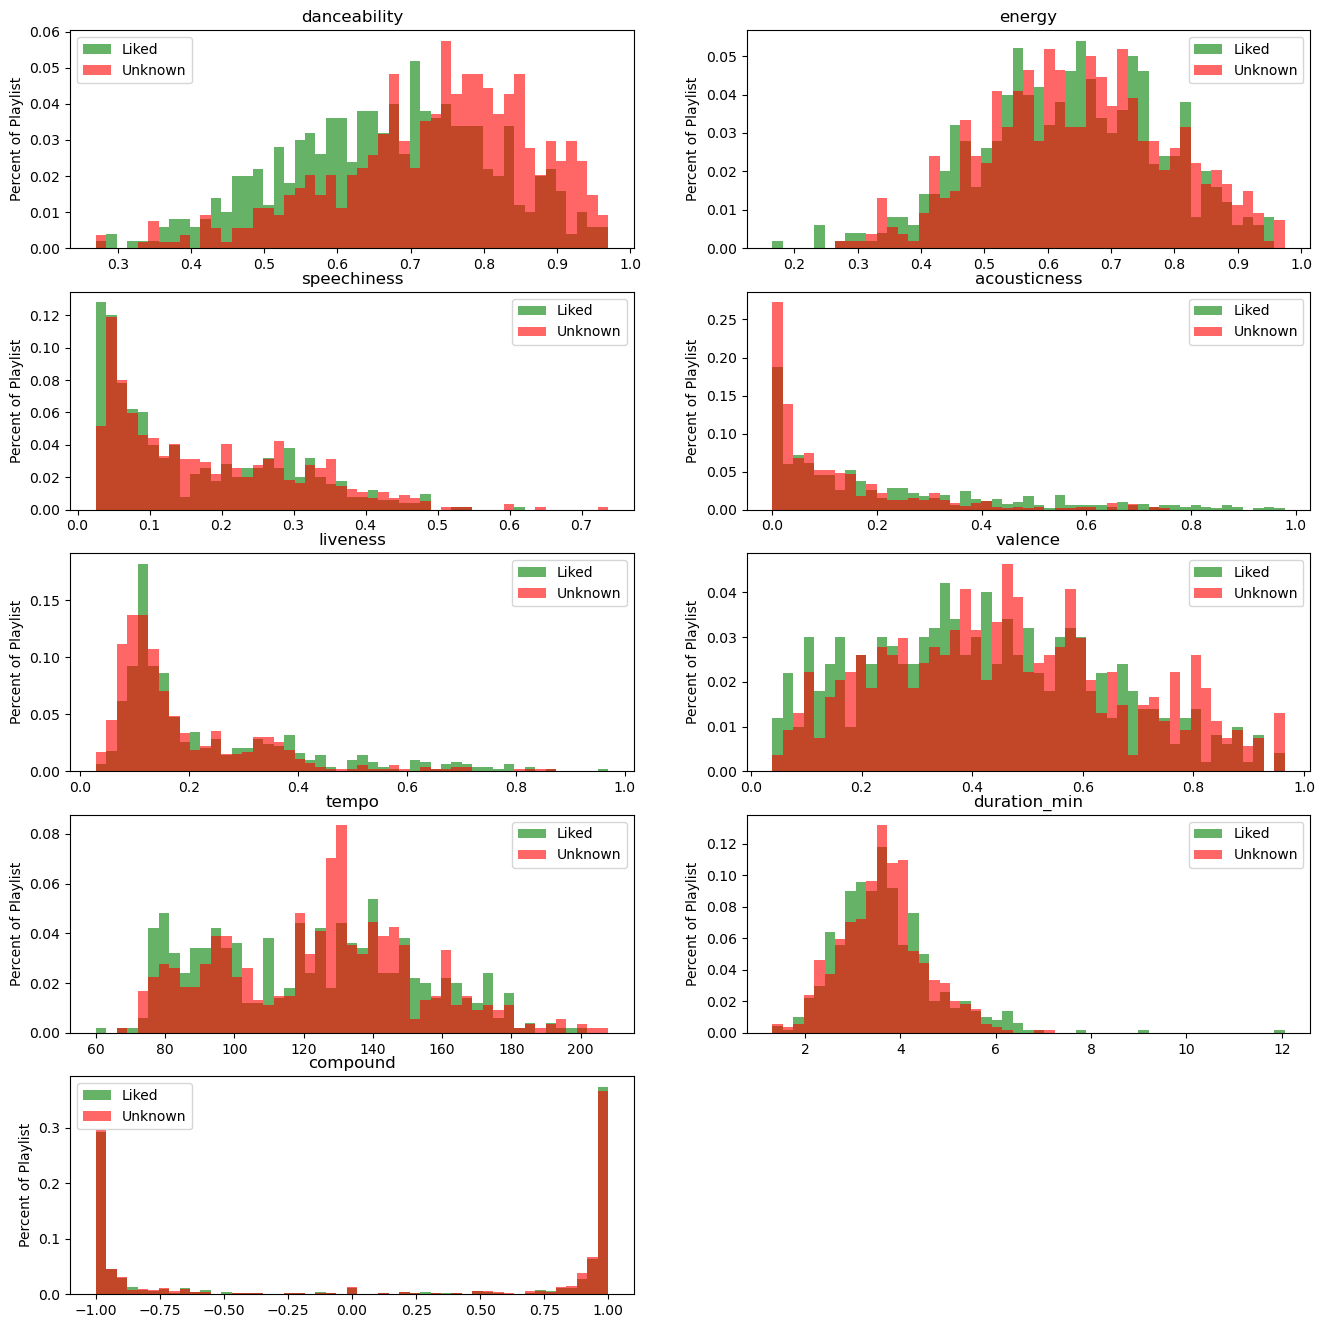

In [3]:
# View distributions
liked_df = music_df.loc[music_df['isLiked']==1].copy()
disliked_df = music_df.loc[music_df['isLiked']==0].copy()

# Remove isLiked from dfs
disliked_df.drop(columns=['isLiked', 'main_artist', 'title'], inplace=True)
liked_df.drop(columns=['isLiked', 'main_artist', 'title'], inplace=True)

# Iterate through features and graph distributions
features = liked_df.columns
plt.figure(figsize=(16, 30)) 
for index, feature in enumerate(features, 1):
    plt.subplot(9, 2, index)
    
    # Determine bin edges based on combined data
    min_value = min(liked_df[feature].min(), disliked_df[feature].min())
    max_value = max(liked_df[feature].max(), disliked_df[feature].max())
    bins = np.linspace(min_value, max_value, 50)
    
     # Plot histograms with the same bins
    plt.hist(liked_df[feature], weights=np.ones(len(liked_df)) / len(liked_df), bins=bins, color='green', alpha=0.6, label='Liked')
    plt.hist(disliked_df[feature], weights=np.ones(len(disliked_df)) / len(disliked_df), bins=bins, color='red', alpha=0.6, label='Unknown')
    
    plt.ylabel("Percent of Playlist")
    plt.legend()
    plt.title(feature)
plt.show()

In [4]:
predictions = pd.read_csv("Predictions.csv")

check = ['main_artist', 'title']
predictions[check] = predictions[check].applymap(lambda x: x.replace('$', '\$'))

#Drop extra index column
predictions.drop(columns =['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

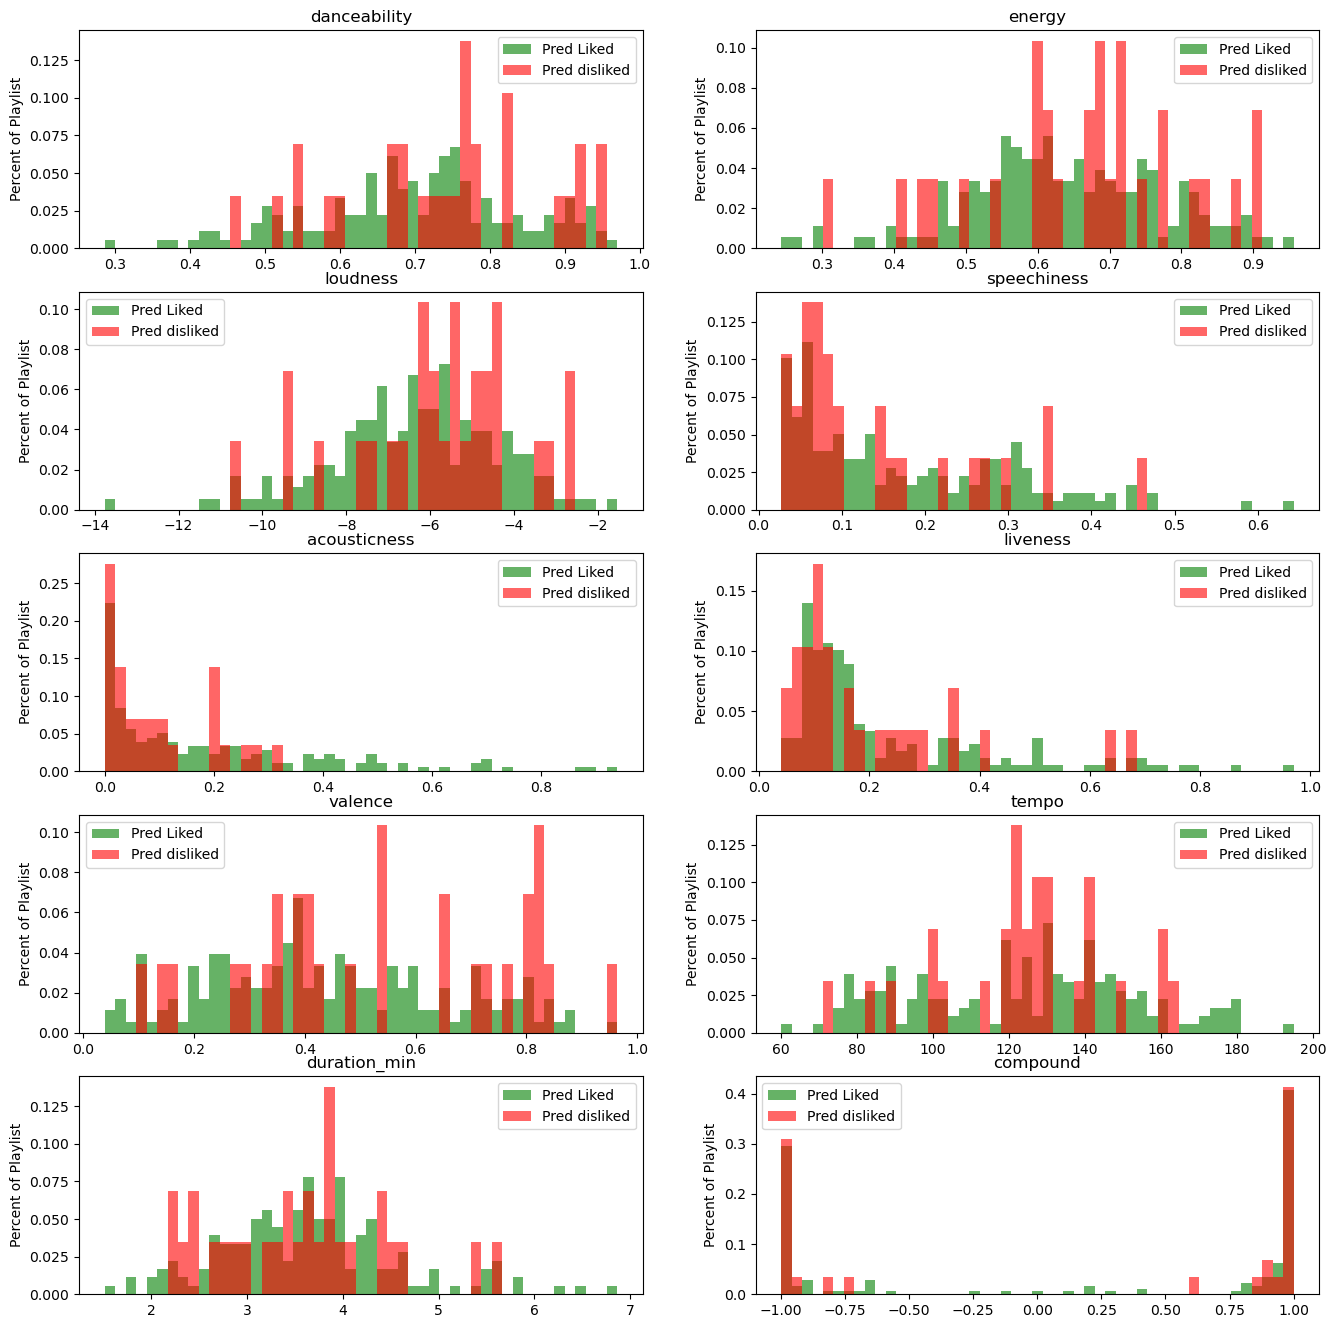

In [5]:
# View distributions
liked_df = predictions.loc[predictions['predicted_isLiked']==1].copy()
disliked_df = predictions.loc[predictions['predicted_isLiked']==0].copy()

# Remove isLiked from dfs
disliked_df.drop(columns=['predicted_isLiked', 'isLiked', 'main_artist', 'title'], inplace=True)
liked_df.drop(columns=['predicted_isLiked', 'isLiked', 'main_artist', 'title'], inplace=True)

# Iterate through features and graph distributions
features = liked_df.columns
plt.figure(figsize=(16, 30)) 
for index, feature in enumerate(features, 1):
    plt.subplot(9, 2, index)
    
    # Determine bin edges based on combined data
    min_value = min(liked_df[feature].min(), disliked_df[feature].min())
    max_value = max(liked_df[feature].max(), disliked_df[feature].max())
    bins = np.linspace(min_value, max_value, 50)
    
     # Plot histograms with the same bins
    plt.hist(liked_df[feature], weights=np.ones(len(liked_df)) / len(liked_df), bins=bins, color='green', alpha=0.6, label='Pred Liked')
    plt.hist(disliked_df[feature], weights=np.ones(len(disliked_df)) / len(disliked_df), bins=bins, color='red', alpha=0.6, label='Pred disliked')
    
    plt.ylabel("Percent of Playlist")
    plt.legend()
    plt.title(feature)
plt.show()